In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration import calibration_curve

import sys
from pathlib import Path
sys.path.append(str(Path("../my_project").resolve()))
import dataset

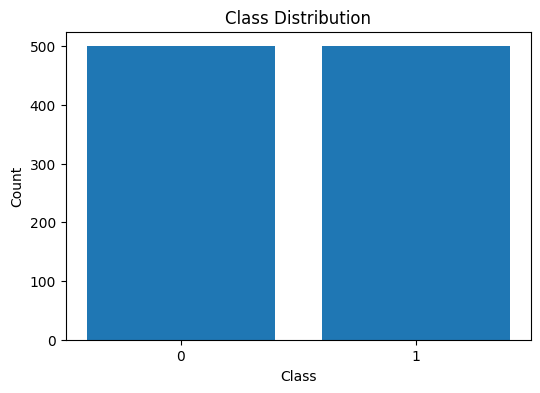

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Image tensor shape: torch.Size([1000, 3, 256, 256])


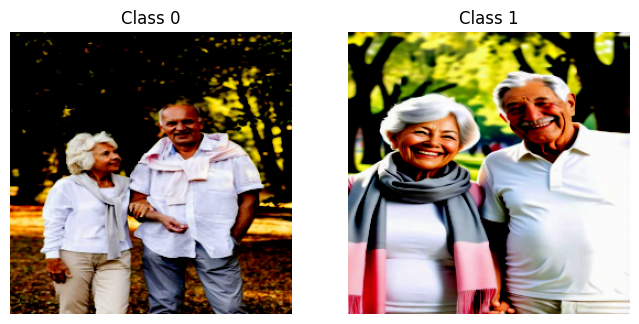

In [9]:
X_tensor, y_tensor = dataset.read_dataset("../data/interim/initial_data")
labels_np = y_tensor.numpy()
classes, counts = np.unique(labels_np, return_counts=True)

plt.figure(figsize=(6,4))
plt.bar(classes, counts)
plt.xticks(classes)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

print("Image tensor shape:", X_tensor.shape)

def imshow(img, title=""):
    img = img.numpy().transpose((1, 2, 0))
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")

plt.figure(figsize=(8,4))
for cls in classes:
    idx = np.where(labels_np == cls)[0][0]
    plt.subplot(1, len(classes), cls+1)
    imshow(X_tensor[idx], f"Class {cls}")
plt.show()